In [423]:
import numpy as np
import pandas as pd
import seaborn as sns

In [424]:
citi_data = pd.read_csv('citibike-tripdata.csv')
citi_data.shape

(577703, 15)

In [425]:
#drop 'birth year' and 'gender' columns, as they will not be used for these questions
citi_data = citi_data.drop(columns=['birth year', 'gender'], inplace=True)

## Question 1: how should bikes differ between customers and subscribers?
**Method**:
- use trip duration as metric to suggest changes in future bike orders
- According to their website, Citibike has a 45-minute time limit before additional fees are applied. I dropped rows where trip duration was greater than 2x this limit (1.5 hrs)

**Findings**:
- After cleaning the data and eliminating potential outliers, we find the average trip time for customers is 20.8 minutes, while the average trip time for subscribers is 14.4 minutes 

**Bike Order Suggestion**
- Due to the slightly longer trip duration for customers when compared to subscribers, I recommend that Citibike invests in bikes with more comfortable seating for casual riders.

In [ ]:
#confirm there are no NaN in usertype column
citi_data[citi_data.usertype.isna()] 

In [426]:
#check overview of trip duration for each usertype
citi_data.groupby('usertype')['tripduration'].describe()

,count,mean,std,min,25%,50%,75%,max
usertype,,,,,,,,
Customer,240319.0,1753.233523,12794.272516,61.0,716.0,1149.0,1621.0,3876479.0
Subscriber,337384.0,1101.423426,4773.600126,61.0,434.0,705.0,1160.0,565786.0


In [428]:
#drop values that are less than 2 minutes and where the start and end stations are the same (defective bike)
trip_data = citi_data.loc[~(citi_data['start station id'] == citi_data['end station id']) & ~(citi_data['tripduration'] < 120)]
#drop values that are greater than 1.5 hrs (5400s), which is 45 minutes longer than the limit for a single ride
trip_data = citi_data.drop(citi_data.index[(citi_data['tripduration'] > 5400)])
trip_data.shape

(568317, 13)

In [429]:
#create temp df to map average trip time for each user type 
trip_duration = pd.DataFrame()
trip_duration['Average_trip_time'] = round(trip_data.groupby('usertype')['tripduration'].mean()/60, 1)
trip_duration.reset_index()

,usertype,Average_trip_time
0,Customer,20.80
1,Subscriber,14.41


Text(0.5, 1.0, 'Avg Trip duration by User Type (min)')

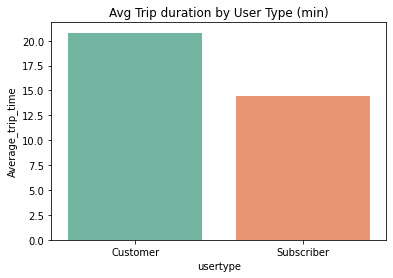

In [455]:
trip_duration_vis = sns.barplot(x=trip_duration.index, y='Average_trip_time', data=trip_duration, palette='Set2')
trip_duration_vis.set_title('Avg Trip duration by User Type (min)')


## Question 2: which stations should increase bikes?

**Method**
- Look at number of trips started at each station by counting 'starttime' and grouping by station ID
- convert starttime to datetime object
- set all dates for starttime to the same date (since we are interested in timestamp and not dates)

**Findings**
- The busiest hours are between 5pm and 7pm, and the stations with the most trips started during those hours are **E 17 St & Broadway**, **Broadway & W 24 St**, and **W 20 St & 11 Ave**

**Bike order suggestion**
- Because there are significantly more trips occurring at the stations listed above from 5pm-7pm, I recommend that Citibike increases available bikes in those areas during evening rush hour. 

In [433]:
import datetime
citi_data.starttime = pd.to_datetime(citi_data.starttime, infer_datetime_format=True)
citi_data.stoptime = pd.to_datetime(citi_data.stoptime, infer_datetime_format=True)

In [434]:
#set all of the dates to 1/1/2022, since we are only interested in time of day 
citi_data.starttime = citi_data.starttime.apply(lambda dt: dt.replace(year=2022, month=1, day=1))

In [437]:
citi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577703 entries, 0 to 577702
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   tripduration             577703 non-null  int64         
 1   starttime                577703 non-null  datetime64[ns]
 2   stoptime                 577703 non-null  datetime64[ns]
 3   start station id         577703 non-null  int64         
 4   start station name       577703 non-null  object        
 5   start station latitude   577703 non-null  float64       
 6   start station longitude  577703 non-null  float64       
 7   end station id           559644 non-null  float64       
 8   end station name         559644 non-null  object        
 9   end station latitude     559644 non-null  float64       
 10  end station longitude    559644 non-null  float64       
 11  bikeid                   577703 non-null  int64         
 12  usertype        

In [438]:
#find the count for each station at each of the 10 busiest hours
time_of_day = citi_data.resample('H', on='starttime')['start station id'].value_counts().sort_values(ascending=False)
time_of_day[:10]

starttime            start station id
2022-01-01 18:00:00  497                 655
2022-01-01 17:00:00  444                 581
2022-01-01 18:00:00  459                 576
2022-01-01 17:00:00  459                 567
2022-01-01 18:00:00  444                 542
2022-01-01 17:00:00  497                 538
2022-01-01 18:00:00  457                 520
                     426                 487
2022-01-01 19:00:00  497                 482
2022-01-01 18:00:00  285                 480
Name: start station id, dtype: int64